# Overfitting
#### It is time to understand deeper

I will try to teach the model the sinus function and ignore the improper fluctuations. I'll pay attention to differences in accuracy in Decision Tree alone and in Random Forest.


## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Create and segment data

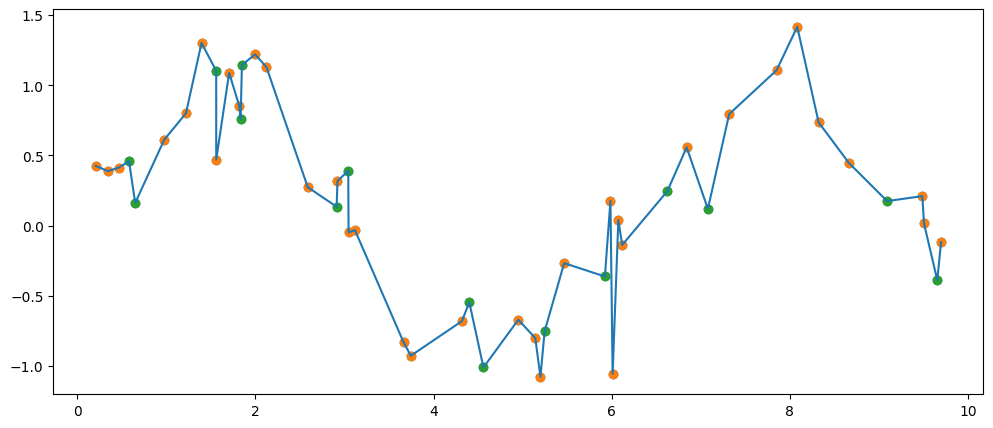

In [ ]:
def f(x):
    return np.sin(x) + 0.3 * np.random.randn(len(x)) # noise

np.random.seed(42)
X = np.sort(np.random.rand(50) * 10).reshape(-1, 1) # 50 points
y = f(X.ravel())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(12,5))
plt.scatter(X,y)
plt.plot(X,y)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.figure(figsize=(12,5))
plt.scatter(X,y)
plt.plot(X,y)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

## Tree Model

In [ ]:
tree = DecisionTreeRegressor(max_depth=None) # tree can get really deep
tree.fit(X_train, y_train)

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

## RandomForest Model

In [115]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Visualization

Data visualisation of overfitting seen in Decision Tree. We used `linspace()` to show the tendencies of both models clearly for evenly spaced points. Blue line is sharper than the orange smoother one. We can see the overfitting of Decision Tree - model tries to get to all points - wants to get perfect on all obtained data by remembering it. It should find the tendencies instead, like Random Forest does, even in spite of missing some points.

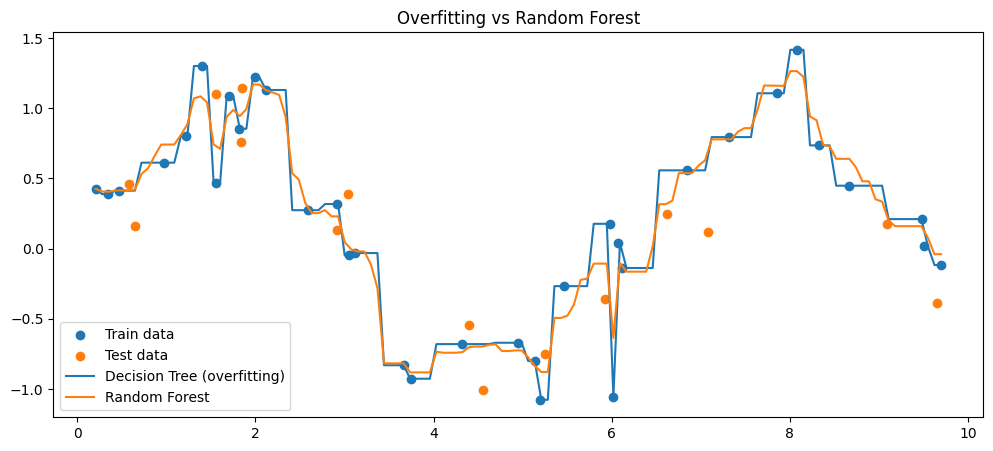

In [142]:
X_plot = np.linspace(X.min(), X.max(), 130).reshape(-1,1)

y_tree_plot = tree.predict(X_plot)
y_rf_plot = rf.predict(X_plot)

plt.figure(figsize=(12,5))

plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, label="Test data")

plt.plot(X_plot, y_tree_plot, label="Decision Tree (overfitting)")
plt.plot(X_plot, y_rf_plot, label="Random Forest")

plt.legend()
plt.title("Overfitting vs Random Forest")
plt.show()
